Hello for this coding sample I'll be using python within the context of Jupyter Notebooks. For this sample I'll be analyzing, cleaning, and building machine learning programs using the nasa near earth asteroids data set.
The first thing to do is import libraries. 

In [1]:
import requests
import json
import numpy as np
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import sqlite3

Read in the xcel data.

In [2]:
df = pd.read_excel("Nasa Near-Earth Objects.xlsx")

Next we'll do some eda.

In [3]:
df.head()


,Unnamed: 0.1,Unnamed: 0,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,0,0,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
1,1,1,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2,2,2,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
3,3,3,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
4,4,4,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...


In [4]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,id,neo_reference_id,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance
count,24000.000000,24000.000000,2.400000e+04,2.400000e+04,23992.000000,23992.000000,23992.000000,24000.000000,24000.000000
mean,11999.500000,11999.500000,7.275111e+06,7.275111e+06,22.942274,0.167777,0.375160,0.915225,2.653104
std,6928.347566,6928.347566,1.333987e+07,1.333987e+07,2.952871,0.293000,0.655169,0.232201,4.468233
min,0.000000,0.000000,2.001981e+06,2.001981e+06,12.580000,0.000609,0.001362,0.070431,0.653754
25%,5999.750000,5999.750000,3.409962e+06,3.409962e+06,20.650000,0.024241,0.054205,0.785150,1.706281
50%,11999.500000,11999.500000,3.703790e+06,3.703790e+06,23.200000,0.060891,0.136157,0.965325,2.480109
75%,17999.250000,17999.250000,3.803897e+06,3.803897e+06,25.200000,0.197040,0.440595,1.068984,3.397965
max,23999.000000,23999.000000,5.408749e+07,5.408749e+07,33.200000,8.101305,18.115068,1.299988,631.895456


Clean the data using z score.

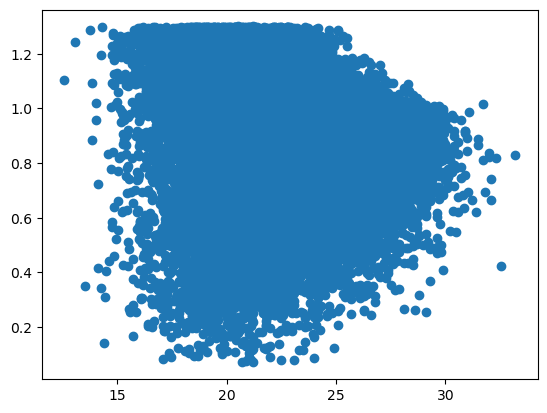

In [5]:
plt.scatter(df["absolute_magnitude_h"],df["perihelion_distance"])


(array([2.3997e+04, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.65375429,  63.77792449, 126.9020947 , 190.0262649 ,
        253.15043511, 316.27460531, 379.39877552, 442.52294572,
        505.64711593, 568.77128613, 631.89545634]),
 <BarContainer object of 10 artists>)

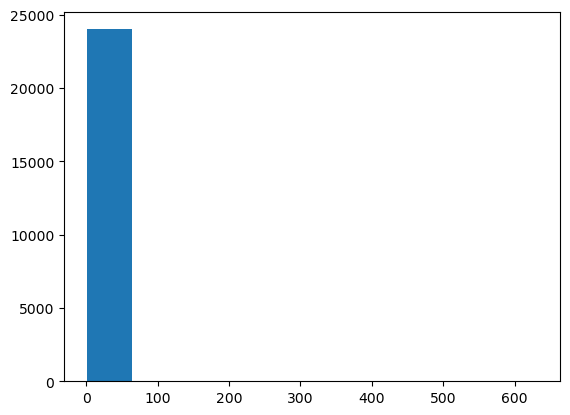

In [6]:
plt.hist(df["aphelion_distance"])

Calculate a new paramater.

In [7]:
df["Median Size"]=(df["kilometers_estimated_diameter_max"]-df["kilometers_estimated_diameter_min"])/2

(array([2.3258e+04, 5.6400e+02, 1.1900e+02, 3.4000e+01, 9.0000e+00,
        5.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([3.76328700e-04, 5.01026873e-01, 1.00167742e+00, 1.50232796e+00,
        2.00297851e+00, 2.50362905e+00, 3.00427959e+00, 3.50493014e+00,
        4.00558068e+00, 4.50623123e+00, 5.00688177e+00]),
 <BarContainer object of 10 artists>)

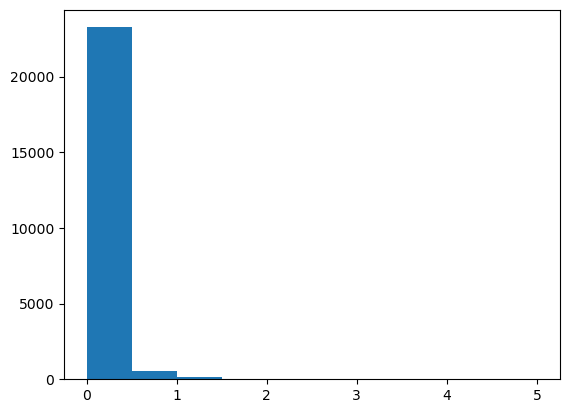

In [8]:
plt.hist(df["Median Size"])

(array([  18.,  320., 1666., 4505., 4723., 6070., 4935., 1515.,  226.,
          14.]),
 array([12.58 , 14.642, 16.704, 18.766, 20.828, 22.89 , 24.952, 27.014,
        29.076, 31.138, 33.2  ]),
 <BarContainer object of 10 artists>)

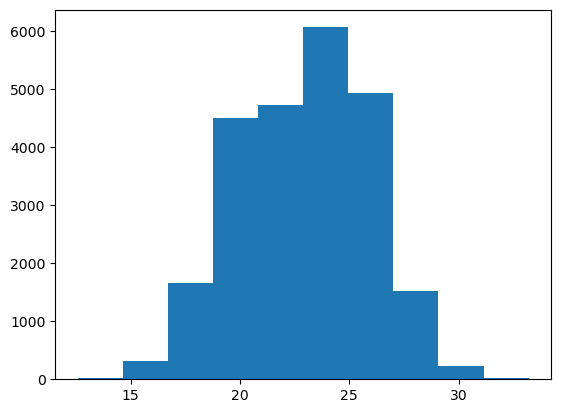

In [9]:

plt.hist(df["absolute_magnitude_h"])



(array([  84.,  299.,  657., 1198., 1762., 2593., 3913., 6735., 4073.,
        2686.]),
 array([0.07043122, 0.19338688, 0.31634254, 0.4392982 , 0.56225386,
        0.68520952, 0.80816518, 0.93112084, 1.0540765 , 1.17703216,
        1.29998782]),
 <BarContainer object of 10 artists>)

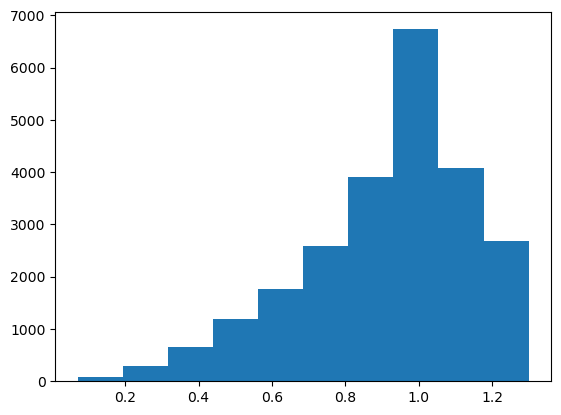

In [10]:
plt.hist(df["perihelion_distance"])

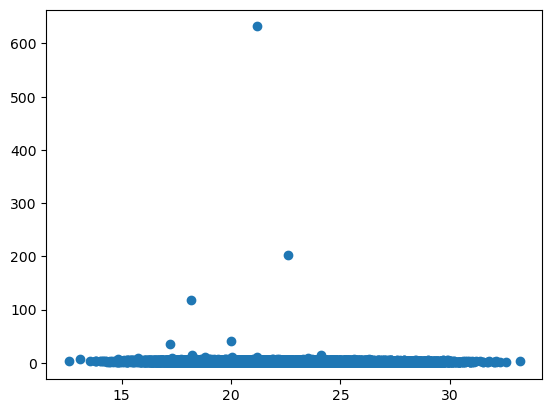

In [11]:
plt.scatter(df["absolute_magnitude_h"], df["aphelion_distance"])

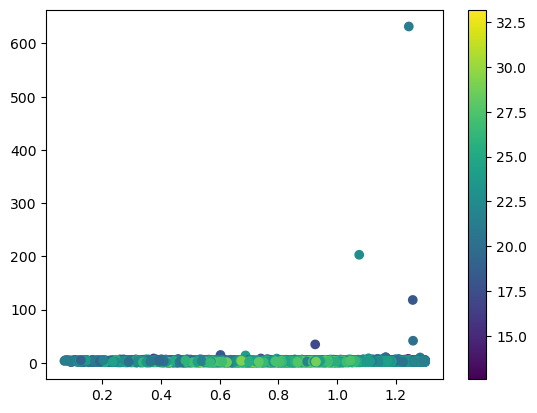

In [12]:
plt.scatter(df["perihelion_distance"], df["aphelion_distance"], c=df["absolute_magnitude_h"])
plt.colorbar()

Calculate a new variable time between first sighting and last sighting. Do some data cleaning.

In [13]:
df['start_date'] = pd.to_datetime(
    df['first_observation_date'], format='%Y-%m-%d', errors='coerce')
df['end_date'] = pd.to_datetime(
    df['last_observation_date'], format='%Y-%m-%d', errors='coerce')
df = df.dropna(subset=['start_date', 'end_date'])
df['start_date'] = pd.to_datetime(df['first_observation_date'])
df['end_date'] = pd.to_datetime(df['last_observation_date'])

df['duration'] = df['end_date'] - df['start_date']
df = df.dropna()

Predict whether an astroid is a threat based off of median size, absolute magnitude, apheliuon distance and perihelion distance. 


In [14]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,...,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description,Median Size,start_date,end_date,duration
0,0,0,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,...,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...,1.484456,1973-03-06,2021-10-20,17760 days
1,1,1,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,...,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...,1.050914,1963-10-16,2021-04-15,21001 days
2,2,2,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,...,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...,0.878147,1960-10-22,2021-06-12,22148 days
3,3,3,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,...,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...,0.624550,1955-12-17,2019-11-10,23339 days
4,4,4,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,...,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...,0.574867,1977-04-24,2021-12-02,16293 days


Here we use conditional logic to see whether the asteroid was discovered before or after the ATLAS near earth asteroid watch project launched. 

In [15]:
cutoff_date = pd.Timestamp('2015-03-01')
df['After Atlas'] = df['start_date'] > cutoff_date

In [16]:
# Features and target variable
X = df[['absolute_magnitude_h', 'Median Size',
        'aphelion_distance', 'perihelion_distance']]
y = df['is_potentially_hazardous_asteroid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[30  1]
 [ 8  5]]

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.97      0.87        31
        True       0.83      0.38      0.53        13

    accuracy                           0.80        44
   macro avg       0.81      0.68      0.70        44
weighted avg       0.80      0.80      0.77        44



Use a for loop to make predictions

In [17]:
# Make predictions using a for loop
predictions = []
for i in range(len(X_test_scaled)):
    # Reshape for single sample prediction
    features = X_test_scaled[i].reshape(1, -1)
    prediction = model.predict(features)[0]  # Predict the class
    predictions.append(prediction)

# Display results
result_df = pd.DataFrame({
    'features': list(X_test_scaled),
    'actual': y_test.values,
    'predicted': predictions
})


Now we will export the resulting data frame to a file format which is not in python's typical use. We will write to SQL and we can also write to json, csv, xlsx

In [18]:


conn = sqlite3.connect('data.db')
# Write to SQLite database
df.to_sql('Cleaned Data', conn, if_exists='replace', index=False)
conn.close()
df.to_excel('output.xlsx', index=False)
df.to_json('output.json')
df.to_csv('output.csv', index=False)

C:\Users\Drewr\AppData\Local\Temp\ipykernel_49352\1718416367.py:3: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  df.to_sql('Cleaned Data', conn, if_exists='replace', index=False)


Save the model for future use.

In [19]:

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Now we access the api of Nasa read in the data and convert to xlsx.

In [20]:
"""
# Define the API endpoint for NASA's NEO Web Service
api_url = 'https://api.nasa.gov/neo/rest/v1/neo/browse'
# Replace with your own API key if you have one
api_key = 'PZ2PKsFAKLHvbb1Awdqsgbprd20U1Yt3UQrwUJK6'

# Function to fetch data


def fetch_neo_data(url, key, start=0, limit=10):
    response = requests.get(
        url, params={'api_key': key, 'start': start, 'limit': limit})
    data = response.json()
    return data


# Fetch data from NASA's NEO Web Service
data = fetch_neo_data(api_url, api_key)

# Extract the relevant information
asteroids = []
for asteroid in data['near_earth_objects']:
    asteroid_info = {
        'name': asteroid['name'],
        'absolute_magnitude': asteroid['absolute_magnitude_h'],
        'aphelion_distance': asteroid['orbital_data']['aphelion_distance'],
        'perihelion_distance': asteroid['orbital_data']['perihelion_distance'],
        'median_size': (asteroid['estimated_diameter']['meters']['estimated_diameter_max'] + asteroid['estimated_diameter']['meters']['estimated_diameter_min']) / 2
    }
    asteroids.append(asteroid_info)

# Convert to DataFrame
df_neo = pd.DataFrame(asteroids)

df_neo.to_excel("New Data.xlsx")
"""